<a href="https://www.kaggle.com/code/omarkhaled28/cnn-grade-prediction?scriptVersionId=139983726" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import random
from keras import layers
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
df1 = pd.read_csv('/kaggle/input/ieeenu-cis-senior-members-grade-prediction-tool/PHY101 Train.csv')
df2 = pd.read_csv('/kaggle/input/ieeenu-cis-senior-members-grade-prediction-tool/PHYS001 samples.csv')
df3 = pd.read_csv('/kaggle/input/ieeenu-cis-senior-members-grade-prediction-tool/PHYS101C samples.csv')

In [3]:
df1

,Sample number,Mid-term (15) (Real),Mid-term 2 (Real),Mid-term (30) (Real),Assignments (10%) (Real),Attendance (5%) (Real),Quiz 1 (Real),Quiz 2 (Real),Quiz 3 (Real),Quiz 4 (Real),Quizzes (10%) total (Real),Labs (5%) (Real),Course work (60%) total (Real),final exam (out of 40),total grades (out of 100)
0,1,4.50,6.5,12.00,9.31,5,6,8,2.5,7.5,7.17,5.0,39,23,62
1,2,9.50,3.5,16.00,9.97,5,4,6,7.5,9.5,7.67,4.4,44,35,79
2,3,7.00,3.5,12.25,10,5,8,6,2.5,4.5,6.67,3.7,38,31,69
3,4,13.25,5,22.38,10,5,8,10,10,12,10,4.9,55,40,95
4,5,17.00,15.5,33.25,10,5,10,10,10,7,10,5.0,60,40,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,2.00,-,3.00,1,-,-,-,-,-,-,0.0,4,4,8
146,147,7.00,7.25,14.38,2,-,4,-,-,4.5,2.83,0.0,20,4,24
147,148,2.00,6.5,10.75,4.75,5.53,8,6,2.5,7,7,2.5,31,21,52
148,149,8.25,6.5,15.63,5,9.33,6,4,7.5,4.5,6,5.0,41,27,68


In [4]:
df2

,Sample number,Mid-term 1 Grade (15) (Real),Mid-term 2 (15) (Real),Mid-term (30) (Real),Quizzes (10%) (Real),Assignments (8%) (Real),Lab sessions (8%) (Real),Attendance (4%) (Real),Coursework (out of 60) total (Real),final exam (out of 40),total grades (out of 100)
0,1,10,2.4,12.4,4,7.54,8,4,36,26,62
1,2,12,12,24,9.83,8,8,4,55,40,95
2,3,4,8.4,12.4,9.5,6.69,5.33,4,38,28,66
3,4,5,9.6,14.6,8.67,8,8,4,44,33,77
4,5,8,6,14,5.53,5.37,7.11,3.75,36,27,63
5,6,1,8.4,9.4,6.5,7.66,8,4,36,20,56
6,7,10,11.4,21.4,10,7.89,7.11,4,51,36,87
7,8,8,12,20,9.5,6.69,5.33,4,46,29,75
8,9,9,9,18,7.17,6.83,8,3.5,44,18,62
9,10,14,15.6,29.6,10,8,8,4,60,40,100


In [5]:
df3

,Sample number,First Midterm (15%) (Real),2nd Midterm (15%) (Real),Quizzes (10%) (Real),Assignments (10%) (Real),Attendance (5%) (Real),Lab sessions (5%) (Real),Coursework (out of 60) total (Real),final exam (out of 40),total grades (out of 100)
0,1,5,1.96,4,6.24,4.4,3.7,26,0,26
1,2,7.22,7.83,1.67,2.5,4.2,1.8,26,18,44
2,3,3.89,7.17,6.17,9.99,4.8,5.0,38,21,59
3,4,7.78,3.91,3.67,10,4.0,3.9,34,11,45
4,5,8.89,8.48,8.83,10,5.0,5.0,47,26,73
...,...,...,...,...,...,...,...,...,...,...
151,152,3.33,11.74,10,10,5.0,5.0,46,35,81
152,153,9.44,15.65,8.12,8.69,4.8,5.0,52,34,86
153,154,7.78,9.13,7.67,9.81,4.2,3.7,43,21,64
154,155,5.56,5.22,6.89,9.19,5.0,5.0,37,24,61


In [6]:
df1_trim = df1.drop(['Sample number', 'Mid-term (30) (Real)', 'Quizzes (10%) total (Real)', 'Course work (60%) total (Real)', 'total grades (out of 100)'], axis=1)

In [7]:
df1_trim

,Mid-term (15) (Real),Mid-term 2 (Real),Assignments (10%) (Real),Attendance (5%) (Real),Quiz 1 (Real),Quiz 2 (Real),Quiz 3 (Real),Quiz 4 (Real),Labs (5%) (Real),final exam (out of 40)
0,4.50,6.5,9.31,5,6,8,2.5,7.5,5.0,23
1,9.50,3.5,9.97,5,4,6,7.5,9.5,4.4,35
2,7.00,3.5,10,5,8,6,2.5,4.5,3.7,31
3,13.25,5,10,5,8,10,10,12,4.9,40
4,17.00,15.5,10,5,10,10,10,7,5.0,40
...,...,...,...,...,...,...,...,...,...,...
145,2.00,-,1,-,-,-,-,-,0.0,4
146,7.00,7.25,2,-,4,-,-,4.5,0.0,4
147,2.00,6.5,4.75,5.53,8,6,2.5,7,2.5,21
148,8.25,6.5,5,9.33,6,4,7.5,4.5,5.0,27


In [8]:
df1_trim_copy = df1_trim.copy()

In [9]:
for i in range(df1_trim_copy.shape[0]):
    for j in range(df1_trim_copy.shape[1]):
        if df1_trim_copy.iloc[i,j] == '-':
            df1_trim_copy.iloc[i,j] = 0

In [10]:
df1_trim_copy = df1_trim_copy.astype('float64')

In [11]:
df1_trim_copy = df1_trim_copy.reindex(columns=['Quiz 1 (Real)', 'Quiz 2 (Real)', 'Mid-term (15) (Real)', 'Quiz 3 (Real)', 'Assignments (10%) (Real)', 'Mid-term 2 (Real)', 'Quiz 4 (Real)', 'Attendance (5%) (Real)', 'Labs (5%) (Real)', 'final exam (out of 40)'])

In [12]:
df1_trim_copy

,Quiz 1 (Real),Quiz 2 (Real),Mid-term (15) (Real),Quiz 3 (Real),Assignments (10%) (Real),Mid-term 2 (Real),Quiz 4 (Real),Attendance (5%) (Real),Labs (5%) (Real),final exam (out of 40)
0,6.0,8.0,4.50,2.5,9.31,6.50,7.5,5.00,5.0,23.0
1,4.0,6.0,9.50,7.5,9.97,3.50,9.5,5.00,4.4,35.0
2,8.0,6.0,7.00,2.5,10.00,3.50,4.5,5.00,3.7,31.0
3,8.0,10.0,13.25,10.0,10.00,5.00,12.0,5.00,4.9,40.0
4,10.0,10.0,17.00,10.0,10.00,15.50,7.0,5.00,5.0,40.0
...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,2.00,0.0,1.00,0.00,0.0,0.00,0.0,4.0
146,4.0,0.0,7.00,0.0,2.00,7.25,4.5,0.00,0.0,4.0
147,8.0,6.0,2.00,2.5,4.75,6.50,7.0,5.53,2.5,21.0
148,6.0,4.0,8.25,7.5,5.00,6.50,4.5,9.33,5.0,27.0


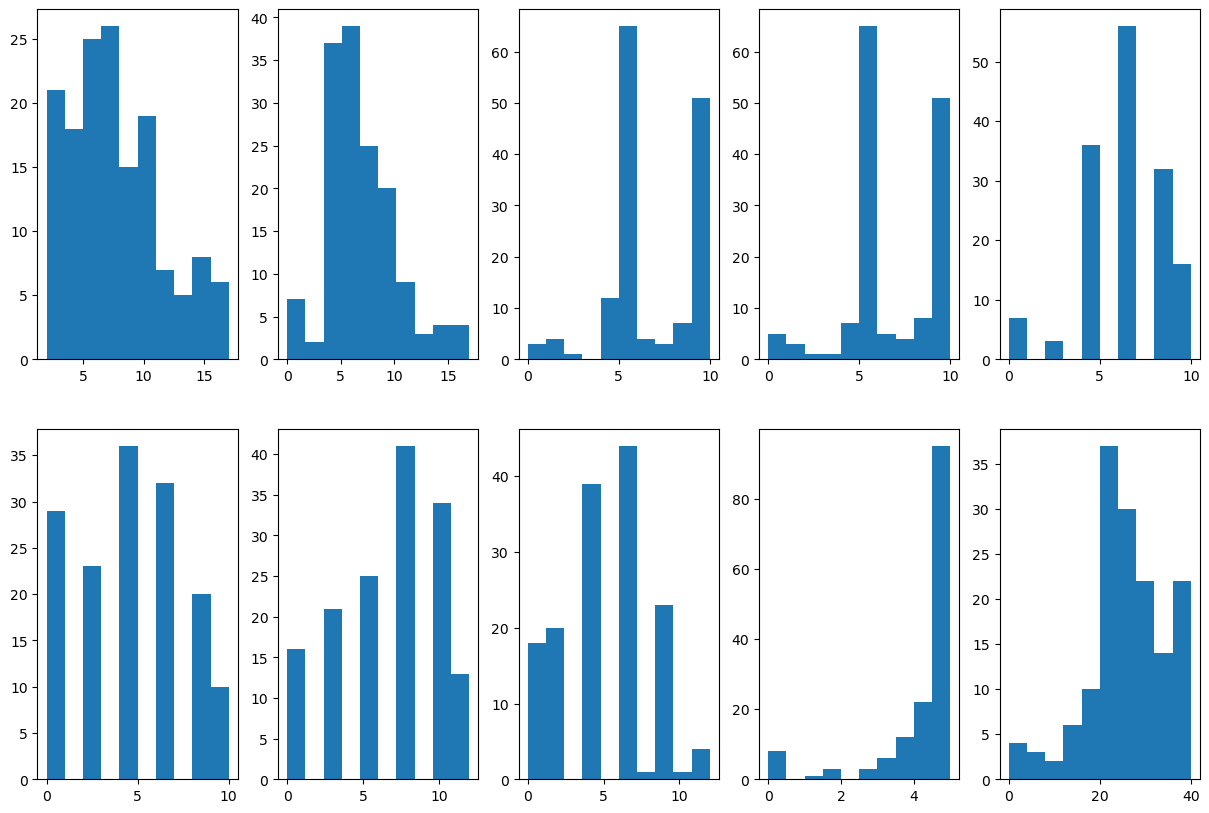

In [13]:
f, axs = plt.subplots(2, 5, figsize=(15, 10))
axs[0,0].hist(df1_trim_copy['Mid-term (15) (Real)'])
axs[0,1].hist(df1_trim_copy['Mid-term 2 (Real)'])
axs[0,2].hist(df1_trim_copy['Assignments (10%) (Real)'])
axs[0,3].hist(df1_trim_copy['Attendance (5%) (Real)'])
axs[0,4].hist(df1_trim_copy['Quiz 1 (Real)'])
axs[1,0].hist(df1_trim_copy['Quiz 2 (Real)'])
axs[1,1].hist(df1_trim_copy['Quiz 3 (Real)'])
axs[1,2].hist(df1_trim_copy['Quiz 4 (Real)'])
axs[1,3].hist(df1_trim_copy['Labs (5%) (Real)'])
axs[1,4].hist(df1_trim_copy['final exam (out of 40)'])
plt.show()

In [14]:
y_list = []
for i in range(df1_trim_copy.shape[0]):
    row = df1_trim_copy.iloc[i]
    row_list = row.tolist()
    y_list.append(row_list)

In [15]:
list_ = []
for i in range(df1_trim_copy.shape[0]):
    num = random.randint(1, 8)
    row = df1_trim_copy.iloc[i].tolist()
    for j in range(1, num+1):
        row[-j] = 0
    matrix = np.array(row).reshape(2, 5, 1)
    list_.append(matrix)

In [16]:
indices = np.random.permutation(150)
data = np.array(list_)[indices]
labels = np.array(y_list)[indices]

split = int(0.8 * len(data))
x_train, x_val = data[:split], data[split:]
y_train, y_val = labels[:split], labels[split:]

In [17]:
i = Input(shape=(2,5,1))

# First convolution layer
x = Conv2D(32, (2, 2), activation='relu', padding='same')(i)
x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.5)(x)
x = Conv2D(32, (2, 2), activation='relu', padding='same')(i)
x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.5)(x)

# Flatten input
x = Flatten()(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
# Classification layer
x = Dense(10, activation='linear')(x)
 
model = Model(i, x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 5, 1)]         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 5, 32)          160       
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 5, 32)          4128      
                                                                 
 batch_normalization_1 (Batc  (None, 2, 5, 32)         128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 2, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 1, 2, 32)          0     

In [18]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics= [tf.keras.metrics.MeanSquaredError()])

In [19]:
es = EarlyStopping(monitor='val_mean_squared_error', mode='min', patience=50,  restore_best_weights=True)

filepath = "weights.h5"
checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True, monitor='val_mean_squared_error')
rlrop = ReduceLROnPlateau(monitor ='val_mean_squared_error', mode = 'min', patience = 5, factor = 0.5, min_lr = 1e-6, verbose = 1)
callbacks_list = [checkpoint, es, rlrop]

In [20]:
epochs = 500

history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = epochs, callbacks = callbacks_list)

Epoch 1/500


2023-08-15 12:12:04.608177: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


4/4 [==============================] - ETA: 0s - loss: 117.7108 - mean_squared_error: 117.7108 
Epoch 1: val_mean_squared_error improved from inf to 102.69537, saving model to weights.h5
4/4 [==============================] - 10s 153ms/step - loss: 117.7108 - mean_squared_error: 117.7108 - val_loss: 102.6954 - val_mean_squared_error: 102.6954 - lr: 0.0010
Epoch 2/500
1/4 [======>.......................] - ETA: 0s - loss: 119.9482 - mean_squared_error: 119.9482
Epoch 2: val_mean_squared_error improved from 102.69537 to 102.62051, saving model to weights.h5
4/4 [==============================] - 0s 44ms/step - loss: 112.1812 - mean_squared_error: 112.1812 - val_loss: 102.6205 - val_mean_squared_error: 102.6205 - lr: 0.0010
Epoch 3/500
1/4 [======>.......................] - ETA: 0s - loss: 119.9488 - mean_squared_error: 119.9488
Epoch 3: val_mean_squared_error improved from 102.62051 to 100.15983, saving model to weights.h5
4/4 [==============================] - 0s 50ms/step - loss: 111.1

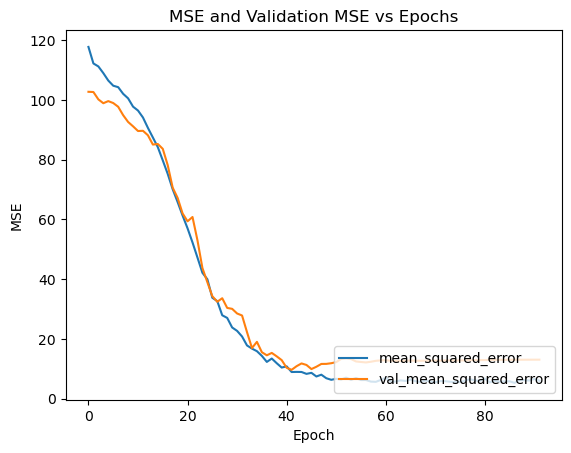

In [21]:
plt.title('MSE and Validation MSE vs Epochs')
plt.plot(history.history['mean_squared_error'], label='mean_squared_error')
plt.plot(history.history['val_mean_squared_error'], label = 'val_mean_squared_error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(loc='lower right')
plt.show()

In [22]:
model.evaluate(x_val, y_val)

1/1 [==============================] - 0s 25ms/step - loss: 9.6636 - mean_squared_error: 9.6636


[9.66356372833252, 9.66356372833252]

In [23]:
model.save('Model.h5')

In [24]:
df_sample = pd.read_csv('/kaggle/input/ieeenu-cis-senior-members-grade-prediction-tool/test.csv')

In [25]:
test_df = df_sample.drop(['Sample number'], axis=1)

In [26]:
test_df

,Quiz 1 (Real),Quiz 2 (Real),Mid-term (15) (Real),Quiz 3 (Real),Assignments (10%) (Real),Mid-term 2 (Real),Quiz 4 (Real),Attendance (5%) (Real),Labs (5%) (Real),final exam (out of 40)
0,6,2,-,-,-,-,-,-,-,-
1,6,2,5.75,-,-,-,-,-,-,-
2,6,2,5.75,5,4.5,-,-,-,-,-
3,6,2,5.75,5,4.5,3.5,7,-,-,-
4,6,2,5.75,5,4.5,3.5,7,8.81,4.8,-
...,...,...,...,...,...,...,...,...,...,...
95,0,0,-,-,-,-,-,-,-,-
96,0,0,4.5,-,-,-,-,-,-,-
97,0,0,4.5,0,1,-,-,-,-,-
98,0,0,4.5,0,1,0,0,-,-,-


In [27]:
for i in range(test_df.shape[0]):
    for j in range(test_df.shape[1]):
        if test_df.iloc[i,j] == '-':
            test_df.iloc[i,j] = 0

In [28]:
test_df = test_df.astype('float64')

In [29]:
test_list = []
for i in range(test_df.shape[0]):
    row = test_df.iloc[i].tolist()
    matrix = np.array(row).reshape(2, 5, 1)
    test_list.append(matrix)

In [30]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator()
test_generator=test_datagen.flow(tf.convert_to_tensor(test_list))

In [31]:
preds = model.predict(test_generator)

4/4 [==============================] - 0s 11ms/step


In [32]:
import csv
with open('Preds.csv', 'w', encoding='utf-8', newline='') as out:
    writer = csv.writer(out)
    writer.writerow(list(df_sample.columns))
    for count, i in enumerate(preds):
        my_array = np.insert(i, 0, count)
        writer.writerow(my_array)